In [1]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.ensemble import BaggingClassifier as Bagging
from sklearn.ensemble import GradientBoostingClassifier as GBoost
from sklearn.ensemble import VotingClassifier as Voting
from sklearn import preprocessing

import xgboost as xgb

## Do training data
### Load amd check training dataset

In [2]:
# load data
train = pd.read_csv("train.csv")
print train.shape

(118529, 17)


In [3]:
train.head()

,voted,gender,cd,hd,age,dbdistance,vccdistance,party,racename,hsonly,mrrg,chldprsnt,cath,evang,nonchrst,otherchrst,days.since.reg
0,Y,M,7.0,31.0,36,NaN,NaN,U,Hispanic,25.4,63.4,54.0,16.7,16.5,39.6,27.3,420
1,Y,F,6.0,38.0,55,NaN,NaN,U,Uncoded,7.9,97.8,59.8,16.7,15.5,30.9,36.9,307
2,Y,F,2.0,53.0,24,NaN,NaN,U,Caucasian,50.2,7.6,49.5,14.6,24.0,29.6,31.7,292
3,Y,F,7.0,30.0,25,NaN,NaN,D,Caucasian,38.0,8.5,47.4,13.1,22.3,33.3,31.4,316
4,Y,M,5.0,19.0,22,NaN,NaN,R,Caucasian,30.5,19.1,23.1,16.0,10.5,39.1,34.5,392


### Check and fill missing data

In [4]:
# check NaN column by column
print 'gender any null? ' + str(train['gender'].isnull().values.any())
print 'cd any null? ' + str(train['cd'].isnull().values.any())
print 'hd any null? ' + str(train['hd'].isnull().values.any())
print 'age any null? ' + str(train['age'].isnull().values.any())
print 'dbdistance any null? ' + str(train['dbdistance'].isnull().values.any())
print 'vccdistance any null? ' + str(train['vccdistance'].isnull().values.any())
print 'party any null? ' + str(train['party'].isnull().values.any())
print 'racename any null? ' + str(train['racename'].isnull().values.any())
print 'hsonly any null? ' + str(train['hsonly'].isnull().values.any())
print 'mrrg any null? ' + str(train['mrrg'].isnull().values.any())
print 'chldprsnt any null? ' + str(train['chldprsnt'].isnull().values.any())
print 'cath any null? ' + str(train['cath'].isnull().values.any())
print 'evang any null? ' + str(train['evang'].isnull().values.any())
print 'nonchrst any null? ' + str(train['nonchrst'].isnull().values.any())
print 'otherchrst any null? ' + str(train['otherchrst'].isnull().values.any())
print 'days.since.reg any null? ' + str(train['days.since.reg'].isnull().values.any())
#print 'Id any null? ' + str(train['Id'].isnull().values.any())

gender any null? False
cd any null? True
hd any null? True
age any null? False
dbdistance any null? True
vccdistance any null? True
party any null? False
racename any null? False
hsonly any null? False
mrrg any null? False
chldprsnt any null? False
cath any null? False
evang any null? False
nonchrst any null? False
otherchrst any null? False
days.since.reg any null? False


In [5]:
# fill missing data
predictors_na = ['cd', 'hd', 'dbdistance', 'vccdistance']
train_filled = pd.DataFrame(train)
train_filled[predictors_na] = train_filled[predictors_na].apply(lambda x:x.fillna(x.mean()))

In [6]:
print 'cd any null? ' + str(train_filled['cd'].isnull().values.any())
print 'hd any null? ' + str(train_filled['hd'].isnull().values.any())
print 'dbdistance any null? ' + str(train_filled['dbdistance'].isnull().values.any())
print 'vccdistance any null? ' + str(train_filled['vccdistance'].isnull().values.any())

cd any null? False
hd any null? False
dbdistance any null? False
vccdistance any null? False


### Do one-hot encoding and split my_train and my_test

In [7]:
# one-hot encoding categorical predictors
predictors = ['gender', 'cd', 'hd', 'age', 'dbdistance', 'vccdistance',
       'party', 'racename', 'hsonly', 'mrrg', 'chldprsnt', 'cath', 'evang',
       'nonchrst', 'otherchrst', 'days.since.reg']
cate = ['gender', 'cd', 'hd', 'party', 'racename', ]

df_x=pd.DataFrame(train_filled[predictors])
df_x.head()

,gender,cd,hd,age,dbdistance,vccdistance,party,racename,hsonly,mrrg,chldprsnt,cath,evang,nonchrst,otherchrst,days.since.reg
0,M,7.0,31.0,36,2.910943,3.242254,U,Hispanic,25.4,63.4,54.0,16.7,16.5,39.6,27.3,420
1,F,6.0,38.0,55,2.910943,3.242254,U,Uncoded,7.9,97.8,59.8,16.7,15.5,30.9,36.9,307
2,F,2.0,53.0,24,2.910943,3.242254,U,Caucasian,50.2,7.6,49.5,14.6,24.0,29.6,31.7,292
3,F,7.0,30.0,25,2.910943,3.242254,D,Caucasian,38.0,8.5,47.4,13.1,22.3,33.3,31.4,316
4,M,5.0,19.0,22,2.910943,3.242254,R,Caucasian,30.5,19.1,23.1,16.0,10.5,39.1,34.5,392


In [8]:
# one hot encoding 'gender'
onehot = pd.get_dummies(df_x['gender'],prefix='gen')
df_x = df_x.drop('gender', axis=1)
df_x = df_x.join(onehot)

# one hot encoding 'cd'
onehot = pd.get_dummies(df_x['cd'],prefix='cd')
df_x = df_x.drop('cd', axis=1)
df_x = df_x.join(onehot)

# one hot encoding 'hd'
onehot = pd.get_dummies(df_x['hd'],prefix='hd')
df_x = df_x.drop('hd', axis=1)
df_x = df_x.join(onehot)

# one hot encoding 'party'
onehot = pd.get_dummies(df_x['party'],prefix='pty')
df_x = df_x.drop('party', axis=1)
df_x = df_x.join(onehot)

# one hot encoding 'racename'
onehot = pd.get_dummies(df_x['racename'])
df_x = df_x.drop('racename', axis=1)
df_x = df_x.join(onehot)

df_x.head(7)
print df_x.shape

(118529, 105)


In [9]:
# separate x, y
x=df_x.values
y=train_filled['voted'].values
print x[0:3,:]
print y[0:3]

[[  36.            2.91094259    3.24225376   25.4          63.4          54.
    16.7          16.5          39.6          27.3         420.            0.
     1.            0.            0.            0.            0.            0.
     0.            0.            0.            1.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            1.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0. 

In [10]:
# Randomly split into train and test sets
my_x_train, my_x_test, my_y_train, my_y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [11]:
print my_x_train.shape
print my_x_test.shape

(88896, 105)
(29633, 105)


## Do testing data
### Load testing data

In [12]:
# load data
test = pd.read_csv("test.csv")
print test.shape
test.head()

(39510, 17)


,gender,cd,hd,age,dbdistance,vccdistance,party,racename,hsonly,mrrg,chldprsnt,cath,evang,nonchrst,otherchrst,days.since.reg,Id
0,M,2.0,52.0,30,NaN,NaN,L,Caucasian,19.5,21.2,25.3,9.8,16.6,45.2,28.4,393,1
1,F,5.0,19.0,20,NaN,NaN,U,Caucasian,39.7,20.2,29.1,12.0,14.4,41.4,32.2,668,2
2,M,4.0,44.0,56,NaN,NaN,R,Caucasian,11.3,62.7,41.3,14.8,14.7,36.0,34.6,606,3
3,F,7.0,34.0,20,NaN,NaN,R,Caucasian,32.8,11.6,33.1,14.5,10.3,44.6,30.6,565,4
4,F,6.0,41.0,26,NaN,NaN,D,Uncoded,10.2,14.7,22.4,8.2,18.4,43.5,29.9,336,5


### Check and fill missing data

In [13]:
# check NaN column by column
print 'gender any null? ' + str(test['gender'].isnull().values.any())
print 'cd any null? ' + str(test['cd'].isnull().values.any())
print 'hd any null? ' + str(test['hd'].isnull().values.any())
print 'age any null? ' + str(test['age'].isnull().values.any())
print 'dbdistance any null? ' + str(test['dbdistance'].isnull().values.any())
print 'vccdistance any null? ' + str(test['vccdistance'].isnull().values.any())
print 'party any null? ' + str(test['party'].isnull().values.any())
print 'racename any null? ' + str(test['racename'].isnull().values.any())
print 'hsonly any null? ' + str(test['hsonly'].isnull().values.any())
print 'mrrg any null? ' + str(test['mrrg'].isnull().values.any())
print 'chldprsnt any null? ' + str(test['chldprsnt'].isnull().values.any())
print 'cath any null? ' + str(test['cath'].isnull().values.any())
print 'evang any null? ' + str(test['evang'].isnull().values.any())
print 'nonchrst any null? ' + str(test['nonchrst'].isnull().values.any())
print 'otherchrst any null? ' + str(test['otherchrst'].isnull().values.any())
print 'days.since.reg any null? ' + str(test['days.since.reg'].isnull().values.any())
print 'Id any null? ' + str(test['Id'].isnull().values.any())

gender any null? False
cd any null? True
hd any null? True
age any null? False
dbdistance any null? True
vccdistance any null? True
party any null? False
racename any null? False
hsonly any null? False
mrrg any null? False
chldprsnt any null? False
cath any null? False
evang any null? False
nonchrst any null? False
otherchrst any null? False
days.since.reg any null? False
Id any null? False


In [14]:
# fill missing data
predictors_na = ['cd', 'hd', 'dbdistance', 'vccdistance']
test_filled = pd.DataFrame(test)
test_filled[predictors_na] = test_filled[predictors_na].apply(lambda x:x.fillna(x.mean()))

### Do one-hot encoding and split train and test

In [15]:
# one-hot encoding categorical predictors
predictors = ['gender', 'cd', 'hd', 'age', 'dbdistance', 'vccdistance',
       'party', 'racename', 'hsonly', 'mrrg', 'chldprsnt', 'cath', 'evang',
       'nonchrst', 'otherchrst', 'days.since.reg']
cate = ['gender', 'cd', 'hd', 'party', 'racename', ]

df_test_x=pd.DataFrame(test_filled[predictors])
df_test_x.head()

,gender,cd,hd,age,dbdistance,vccdistance,party,racename,hsonly,mrrg,chldprsnt,cath,evang,nonchrst,otherchrst,days.since.reg
0,M,2.0,52.0,30,2.988858,3.42336,L,Caucasian,19.5,21.2,25.3,9.8,16.6,45.2,28.4,393
1,F,5.0,19.0,20,2.988858,3.42336,U,Caucasian,39.7,20.2,29.1,12.0,14.4,41.4,32.2,668
2,M,4.0,44.0,56,2.988858,3.42336,R,Caucasian,11.3,62.7,41.3,14.8,14.7,36.0,34.6,606
3,F,7.0,34.0,20,2.988858,3.42336,R,Caucasian,32.8,11.6,33.1,14.5,10.3,44.6,30.6,565
4,F,6.0,41.0,26,2.988858,3.42336,D,Uncoded,10.2,14.7,22.4,8.2,18.4,43.5,29.9,336


In [16]:
# one hot encoding 'gender'
onehot = pd.get_dummies(df_test_x['gender'],prefix='gen')
df_test_x = df_test_x.drop('gender', axis=1)
df_test_x = df_test_x.join(onehot)

# one hot encoding 'cd'
onehot = pd.get_dummies(df_test_x['cd'],prefix='cd')
df_test_x = df_test_x.drop('cd', axis=1)
df_test_x = df_test_x.join(onehot)

# one hot encoding 'hd'
onehot = pd.get_dummies(df_test_x['hd'],prefix='hd')
df_test_x = df_test_x.drop('hd', axis=1)
df_test_x = df_test_x.join(onehot)

# one hot encoding 'party'
onehot = pd.get_dummies(df_test_x['party'],prefix='pty')
df_test_x = df_test_x.drop('party', axis=1)
df_test_x = df_test_x.join(onehot)

# one hot encoding 'racename'
onehot = pd.get_dummies(df_test_x['racename'])
df_test_x = df_test_x.drop('racename', axis=1)
df_test_x = df_test_x.join(onehot)

df_test_x.head(7)
print df_test_x.shape

(39510, 105)


In [17]:
# separate x
test_x=df_test_x.values
print test_x[0:3,:]

[[  30.            2.98885831    3.42336005   19.5          21.2          25.3
     9.8          16.6          45.2          28.4         393.            0.
     1.            0.            0.            1.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            1.            0.            0.

# =================
# START of TEST

# Test for CS205 project
### Set testing parameters

In [38]:
# Testing parameters
num_sample = 50000
# Parameters used for both GBoost and XGBoost
GBoost_stages = 50
GBoost_depth = 6

# Randomly split into train and test sets
my_x_train, my_x_test, my_y_train, my_y_test = train_test_split(x, y, test_size=0.05, random_state=42)

# Slice the first num_sample
my_x_train = my_x_train[0:num_sample,]
my_y_train = my_y_train[0:num_sample,]

# Print data size
print my_x_train.shape
print my_y_train.shape

(50000, 105)
(50000,)


## Modeling and optimization

### GBoost

In [28]:
start_time = time.time()
mGBoost = GBoost(n_estimators=GBoost_stages, max_depth=GBoost_depth)
mGBoost.fit(my_x_train, my_y_train)
Gcompute_time = time.time() - start_time

print "GradBoosting score: " + str(mGBoost.score(my_x_test, my_y_test))
print "Training Time: " + str(Gcompute_time) + "sec"

GradBoosting score: 0.697486080648
Training Time: 4.53233599663sec


In [29]:
mGBoost.score(my_x_train, my_y_train)

0.77559999999999996

In [30]:
mGBoost.classes_

array(['N', 'Y'], dtype=object)

In [31]:
# Check parameters
print mGBoost

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


### XGBoost

In [39]:
start_time = time.time()
mXGBoost = xgb.XGBClassifier(n_estimators=GBoost_stages, max_depth=GBoost_depth)
mXGBoost.fit(my_x_train, my_y_train)
XGcompute_time = time.time() - start_time

print "XGBoost score: " + str(mXGBoost.score(my_x_test, my_y_test))
print "Compute Time: " + str(XGcompute_time) + "sec"

XGBoost score: 0.706428209887
Compute Time: 13.1510279179sec


In [40]:
mXGBoost.score(my_x_train, my_y_train)

0.72799999999999998

In [37]:
mXGBoost.classes_

array(['N', 'Y'], dtype=object)

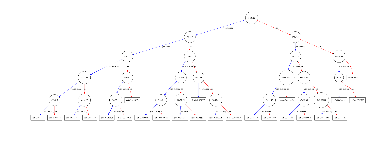

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from xgboost import plot_tree 
plot_tree(mXGBoost, num_trees=2)
# plt.show()
plt.savefig("xgboost.png")

In [64]:
# Check parameters
print mXGBoost

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


## Plot accuracy

In [169]:
# compute training set deviance
GBoost_train_acc = np.zeros((GBoost_stages,), dtype=np.float64)

for idx, pred_y_now in enumerate(mGBoost.staged_predict(my_x_train)):
    GBoost_train_acc[idx] = float(sum(pred_y_now == my_y_train))/len(my_y_train)

print GBoost_train_acc

[ 0.6772  0.6772  0.6853  0.6878  0.6881  0.6885  0.6885  0.6886  0.6897
  0.6919  0.6953  0.6978  0.7057  0.7061  0.7106  0.7131  0.7144  0.7158
  0.7175  0.7197  0.7233  0.7239  0.725   0.7265  0.7287  0.73    0.7315
  0.733   0.7339  0.7351  0.7355  0.7367  0.737   0.7393  0.7402  0.7399
  0.7414  0.7419  0.7429  0.7444  0.7441  0.7467  0.7472  0.7484  0.7498
  0.7504  0.7518  0.7523  0.7536  0.7548]


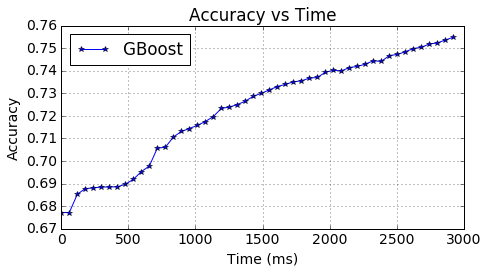

In [182]:
# KERNEL PERCEPTRON
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
# plot the data in feature space
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Time')
#ax.set_xticks(range(0, GBoost_stages+5, 5))
#ax.set_ylim([0.65, 0.75])

Gtick = np.array(range(GBoost_stages))*(Gcompute_time/GBoost_stages*1000)
#XGtick = np.array(range(GBoost_stages))*(Gcompute_time/GBoost_stages*1000)

ax.plot(Gtick, GBoost_train_acc, 'b-*', label='GBoost')
#ax.plot(XGtick,mXGBoost.train_score_, 'g-', label='XGBoost')
#ax.plot(range(len(loss_K20_R3)), loss_K20_R3/6000, 'r-', label='K=20,Run3')
#ax.plot(range(len(loss_K20_R3)), loss_K20_R3/6000, 'k-', label='K=20,Run3')

ax.legend(loc=2)
ax.grid()
plt.tight_layout()
plt.show() 

# END of TEST
# =================

### GridSearch by cross validation

In [21]:
# --------------
# A generic function to do CV
# --------------
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best

### Random forest

In [14]:
# --------------
# Optimize n_estimators, max_depth in random forest
# --------------
dt_rforest = ensemble.RandomForestClassifier(max_depth=3)
rforest = dt_rforest.fit(my_x_train, my_y_train)

parameters = {'max_depth': [12, 14, 16, 18, 20, 22, 24], 'n_estimators': [20, 25, 30, 35, 40]}
rforest = cv_optimize(rforest, parameters, my_x_train, my_y_train, n_jobs=10, n_folds=5, score_func=None)
print 'Optimal n_estimators: ' + str(rforest.n_estimators)
print 'Optimal max_depth: ' + str(rforest.max_depth)

Optimal n_estimators: 40
Optimal max_depth: 18


In [15]:
# --------------
# Random Forest
# --------------
start_time = time.time()
dt_rforest = ensemble.RandomForestClassifier(max_depth = 18, n_estimators = 40)
dt_rforest.fit(my_x_train, my_y_train)
compute_time = time.time() - start_time

print "Random forest score: " + str(dt_rforest.score(my_x_test, my_y_test))
print "Compute Time", compute_time

Random forest score: 0.711976512672
Compute Time 6.15420794487


In [16]:
dt_rforest.score(my_x_train, my_y_train)

0.80831533477321815

In [68]:
dt_rforest.classes_

array(['N', 'Y'], dtype=object)

## Do prediction

### Random Forest

In [82]:
pred_y = dt_rforest.predict_proba(test_x)
print pred_y[0:5,:]

[[ 0.37287798  0.62712202]
 [ 0.51054856  0.48945144]
 [ 0.25507251  0.74492749]
 [ 0.29004631  0.70995369]
 [ 0.21602965  0.78397035]]


### KNN

In [89]:
pred_y = dt_KNN.predict_proba(test_x)
print pred_y[0:5,:]

[[ 0.43069753  0.56930247]
 [ 0.4121044   0.5878956 ]
 [ 0.33823453  0.66176547]
 [ 0.43047334  0.56952666]
 [ 0.06307356  0.93692644]]


### GBoost

In [94]:
pred_y = mGBoost.predict_proba(test_x)
print pred_y[0:5,:]

[[ 0.33929182  0.66070818]
 [ 0.55804637  0.44195363]
 [ 0.27185358  0.72814642]
 [ 0.32067297  0.67932703]
 [ 0.20513272  0.79486728]]


### Bagging

In [100]:
pred_y = mBag.predict_proba(test_x)
print pred_y[0:5,:]

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...

[[ 0.5         0.5       ]
 [ 0.5         0.5       ]
 [ 0.38333333  0.61666667]
 [ 0.28333333  0.71666667]
 [ 0.11666667  0.88333333]]


## Save prediction

In [101]:
df_pred = pd.DataFrame(test_filled['Id'])
df_pred['voted'] = pd.Series(pred_y[:,1], index=df_pred.index)
df_pred.head()

,Id,voted
0,1,0.500000
1,2,0.500000
2,3,0.616667
3,4,0.716667
4,5,0.883333


In [102]:
#df_pred.to_csv('pred_RF_d18_n35.csv',index=False)
#df_pred.to_csv('pred_KNN_k21.csv',index=False)
#df_pred.to_csv('pred_GBoost.csv',index=False)
df_pred.to_csv('pred_Bagging.csv',index=False)